## 상관분석 (correlation analysis)
- 두 변수 간의 관계의 강도(얼마나 밀접하게 유지되어 있는지)를 분석 

### 상관계수(correlation coefficient) r
- 상관계수 범위 : $-1 \leq r \leq 1 $
- 수식 

$$ r= \frac{\displaystyle\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{(n-1)S_xS_y}$$

- $\bar{x}, \bar{y} : 평균값 $
- $ S_x,S_y : 표준편차 $



### pandas 활용해서 상관계수(r)구하기
- df.corr( ) 사용 

In [18]:
# data1 과 data1은 동일 함으로 1.0 이라는 상관계수를 가지고 있다 
# data2 와 data1 의 상관계수는 0.8876 

import pandas as pd

rows = [int(i) for i in range(len(data1))]
s_d1 = pd.Series(data1, index=rows)
s_d2 = pd.Series(data2, index=rows)
clm = ['data1', 'data2']
d = pd.DataFrame(columns=clm)
d['data1'] = s_d1
d['data2'] = s_d2
d.corr()

,data1,data2
data1,1.000000,0.887612
data2,0.887612,1.000000


### 양의 상관계수 ➕
- x축 (data1)이 커질 수록 y축(data2)도 함께 커진다 

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


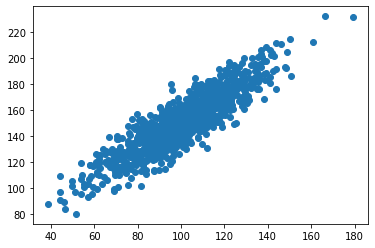

In [17]:

# generate related variables 
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

# seed random number generator
seed(1)

# prepare data 
data1 = 20 *randn(1000) + 100
data2 = data1 + (10 * randn(1000) +50)

# summarize 
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

# plot 
pyplot.scatter(data1, data2)

### 음의 상관계수 ➖
- x축(data1)이 커지면 y축(data2)는 줄어든다.

data1: mean=100.776 stdv=19.620
data2: mean=-50.503 stdv=21.959


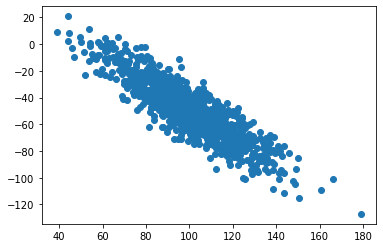

In [20]:
seed(1)
# prepare data 
data1 = 20 *randn(1000) + 100
data2 = -data1 + (10 * randn(1000) +50)

#summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

# plot
pyplot.scatter(data1,data2)


### 데이터 활용해서 상관계수(r)구하기 

* 데이터 샘플 : iris

In [22]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data

data.shape


(150, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


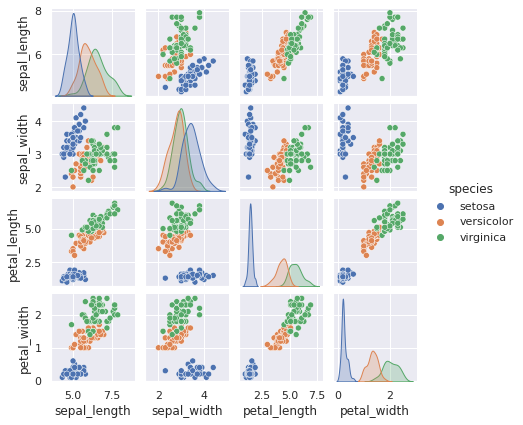

In [23]:
# 데이터 확인 
%matplotlib inline
import seaborn as sns; sns.set()

sns_iris = sns.load_dataset('iris')
sns.pairplot(sns_iris, hue='species', size=1.5)

* pandas 사용 

In [26]:
# 상관계수(correlation coefficient)
# sepal width 와 petal width는 "음의 상관계수"
clm = ['data1', 'data2']
d = pd.DataFrame(columns=clm)
d['data1'] = data[:,1]        # sepal width
d['data2'] = data[:,3]        # petal width
d.corr()

,data1,data2
data1,1.000000,-0.366126
data2,-0.366126,1.000000


* 수식 사용해서 구하기

correlation coefficient: 0.9693276155061709


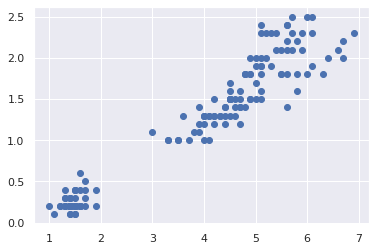

In [32]:
data1 = data[:, 2]    # petal length
data2 = data[:, 3]    # petal width 
mean1 = mean(data1)
std1 = std(data1)
mean2 = mean(data2)
std2 = std(data2)
Qx = data1 - mean1
Qy = data2 - mean2
Q = Qx * Qy
r = sum(Q)/((len(Q)-1)*std1*std2)
print('correlation coefficient:', r)

pyplot.scatter(data1,data2)

* Pearson's correlation

In [28]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr1, _ = pearsonr(data[:,2], data[:,3])
print('Pearsons correlation between data2 and data3: %.3f' % corr1)
corr1,_ = pearsonr(data[:,1], data[:, 3])
print('Pearsons correlation between data1 and data3: %.3f' % corr1)

Pearsons correlation between data2 and data3: 0.963
Pearsons correlation between data1 and data3: -0.366
